### Common Plots for Regression Evaluation:

1. **Predicted vs. Actual (Ground Truth) Plot**  
   - In a good model, points should  fall close to the diagonal (y = x).

2. **Residual Plot (Errors vs. Predicted/Actual)**  
   - Residuals = Actual − Predicted  
   - Should look like random noise (no clear pattern).

3. **Histogram or KDE of Residuals**  
   - Checks if residuals are roughly normally distributed.

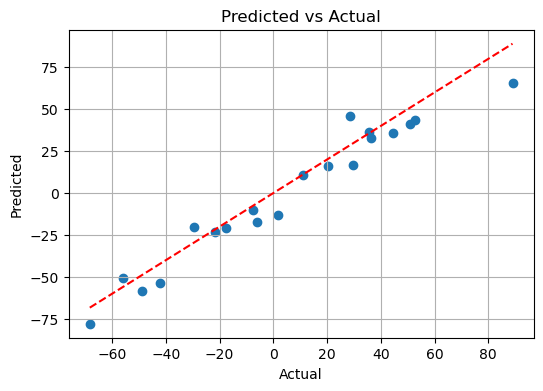

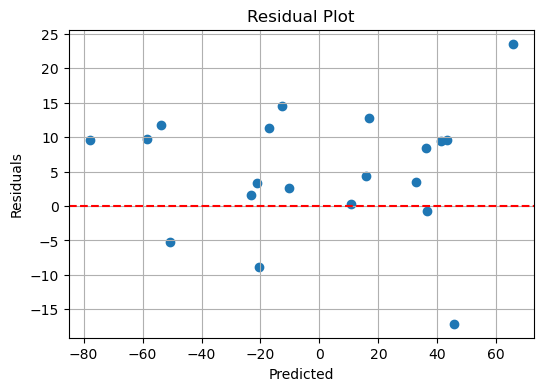

MSE: 104.20222653187027
R² Score: 0.9374151607623286


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# 1. Predicted vs Actual
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.grid(True)
plt.show()

# 2. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

# 3. Metrics (optional)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


### 📊 **Histogram / KDE of Residuals**

#### ✅ **What is it?**
- A **histogram** (or **Kernel Density Estimate (KDE)** curve) of the **residuals**:  
  $$
  \text{Residual} = y_{\text{true}} - y_{\text{pred}}
  $$

#### 🎯 **Purpose**
- To check **how the errors (residuals)** are distributed.
- A good regression model should have:
  - Residuals roughly **centered around 0**
  - **Symmetrical** (ideally like a bell curve → Normal distribution)
  - No extreme skewness or outliers

This helps identify:
- Systematic errors (e.g., always underpredicting or overpredicting)
- Non-linear patterns that a linear model can't capture
- Heteroscedasticity (variance of residuals changing with prediction)

### 🔍 What to Look For:

- ✅ **Normal-looking bell shape**: Great!
- ⚠️ **Skewed or multi-modal**: Might indicate model or data issues.
- ❌ **Residuals far from zero (outliers)**: Could be influential data points or noise.

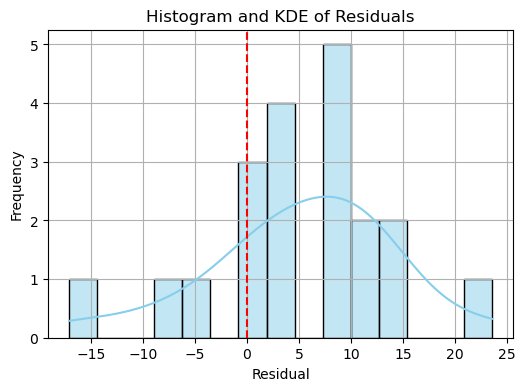

In [2]:
import seaborn as sns

# Compute residuals
residuals = y_test - y_pred

# Histogram + KDE of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=15, color="skyblue")
plt.axvline(0, color='red', linestyle='--')
plt.title("Histogram and KDE of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
